In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.express as px

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving all_comments__202203.xlsx to all_comments__202203.xlsx


In [ ]:
df=pd.read_excel('all_comments__202203.xlsx')

In [ ]:
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date de réponse  2399 non-null   object
 1   ID répondant     2399 non-null   int64 
 2   score            2399 non-null   int64 
 3   comment          2399 non-null   object
 4   nps_category     2399 non-null   object
dtypes: int64(2), object(3)
memory usage: 93.8+ KB


In [ ]:
df.dtypes

Date de réponse    object
ID répondant        int64
score               int64
comment            object
dtype: object

In [ ]:
df.isnull().sum()


Date de réponse    0
ID répondant       0
score              0
comment            0
dtype: int64

In [ ]:
conditions = [
    (df['score'] <= 6),
    ((df['score'] >6 )& (df['score'] < 9)),
    (df['score'] >= 9)
]

values = ['Detractor', 'Passive', 'Promoter']

df['nps_category'] = np.select(conditions, values)


In [ ]:
df.head()

##NPS Category Amounts

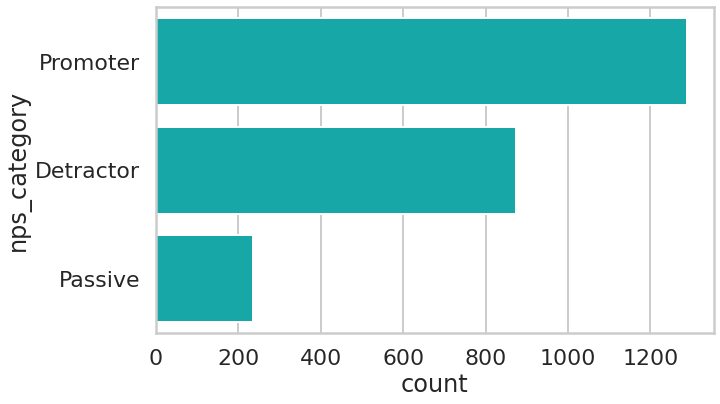

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(y="nps_category", data=df, color='C')

##calcul de NPS
NPS = (Promoters - Detractors) (Promoters + Passives + Detractors)

In [ ]:
promoters_amt = len(df[df['nps_category'].dropna() == 'Promoter'])
detractors_amt = len(df[df['nps_category'].dropna() == 'Detractor'])
passive_amt = len(df[df['nps_category'].dropna() == 'Passive'])

NPS = (promoters_amt - detractors_amt)/(promoters_amt+detractors_amt+passive_amt) *100
print('NPS is: ', NPS, '%')


NPS is:  17.257190496040018 %


##Percentage of each Rating

In [ ]:
fig = px.pie(df, values=df['score'], names=df['score'], title='Percentage of Rating')
fig.show()

In [ ]:
df['score'].value_counts()

10    872
0     432
9     417
8     150
1     104
3      88
7      85
5      79
2      72
6      51
4      49
Name: score, dtype: int64

##Count of each Rating

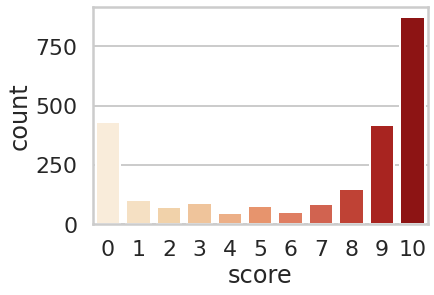

In [ ]:
# Bar Chart Example #1 (Simple): Categorical Variables Showing Counts
sns.countplot(x="score", palette="OrRd", data=df)